   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9        4.0   
1            1

<ipython-input-9-29c4daef26ba>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_dist.index, y=diabetes_dist.values, palette='viridis')


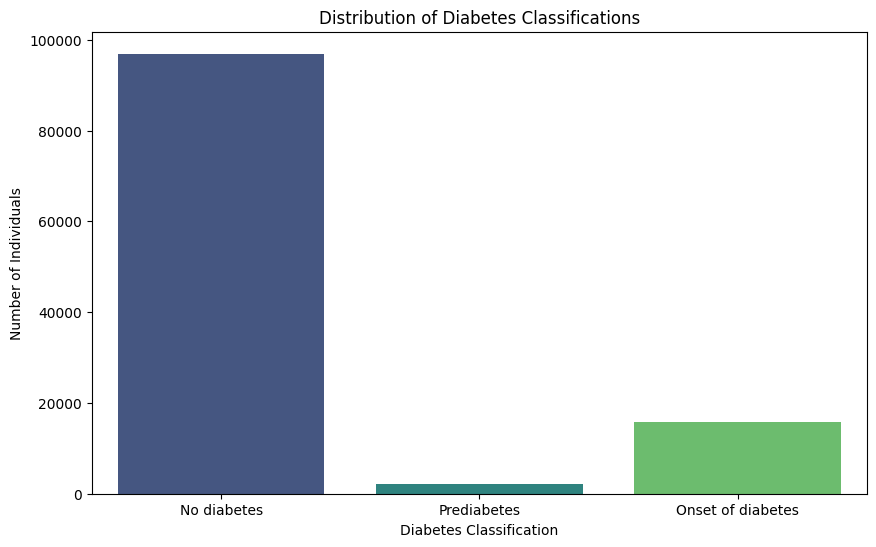

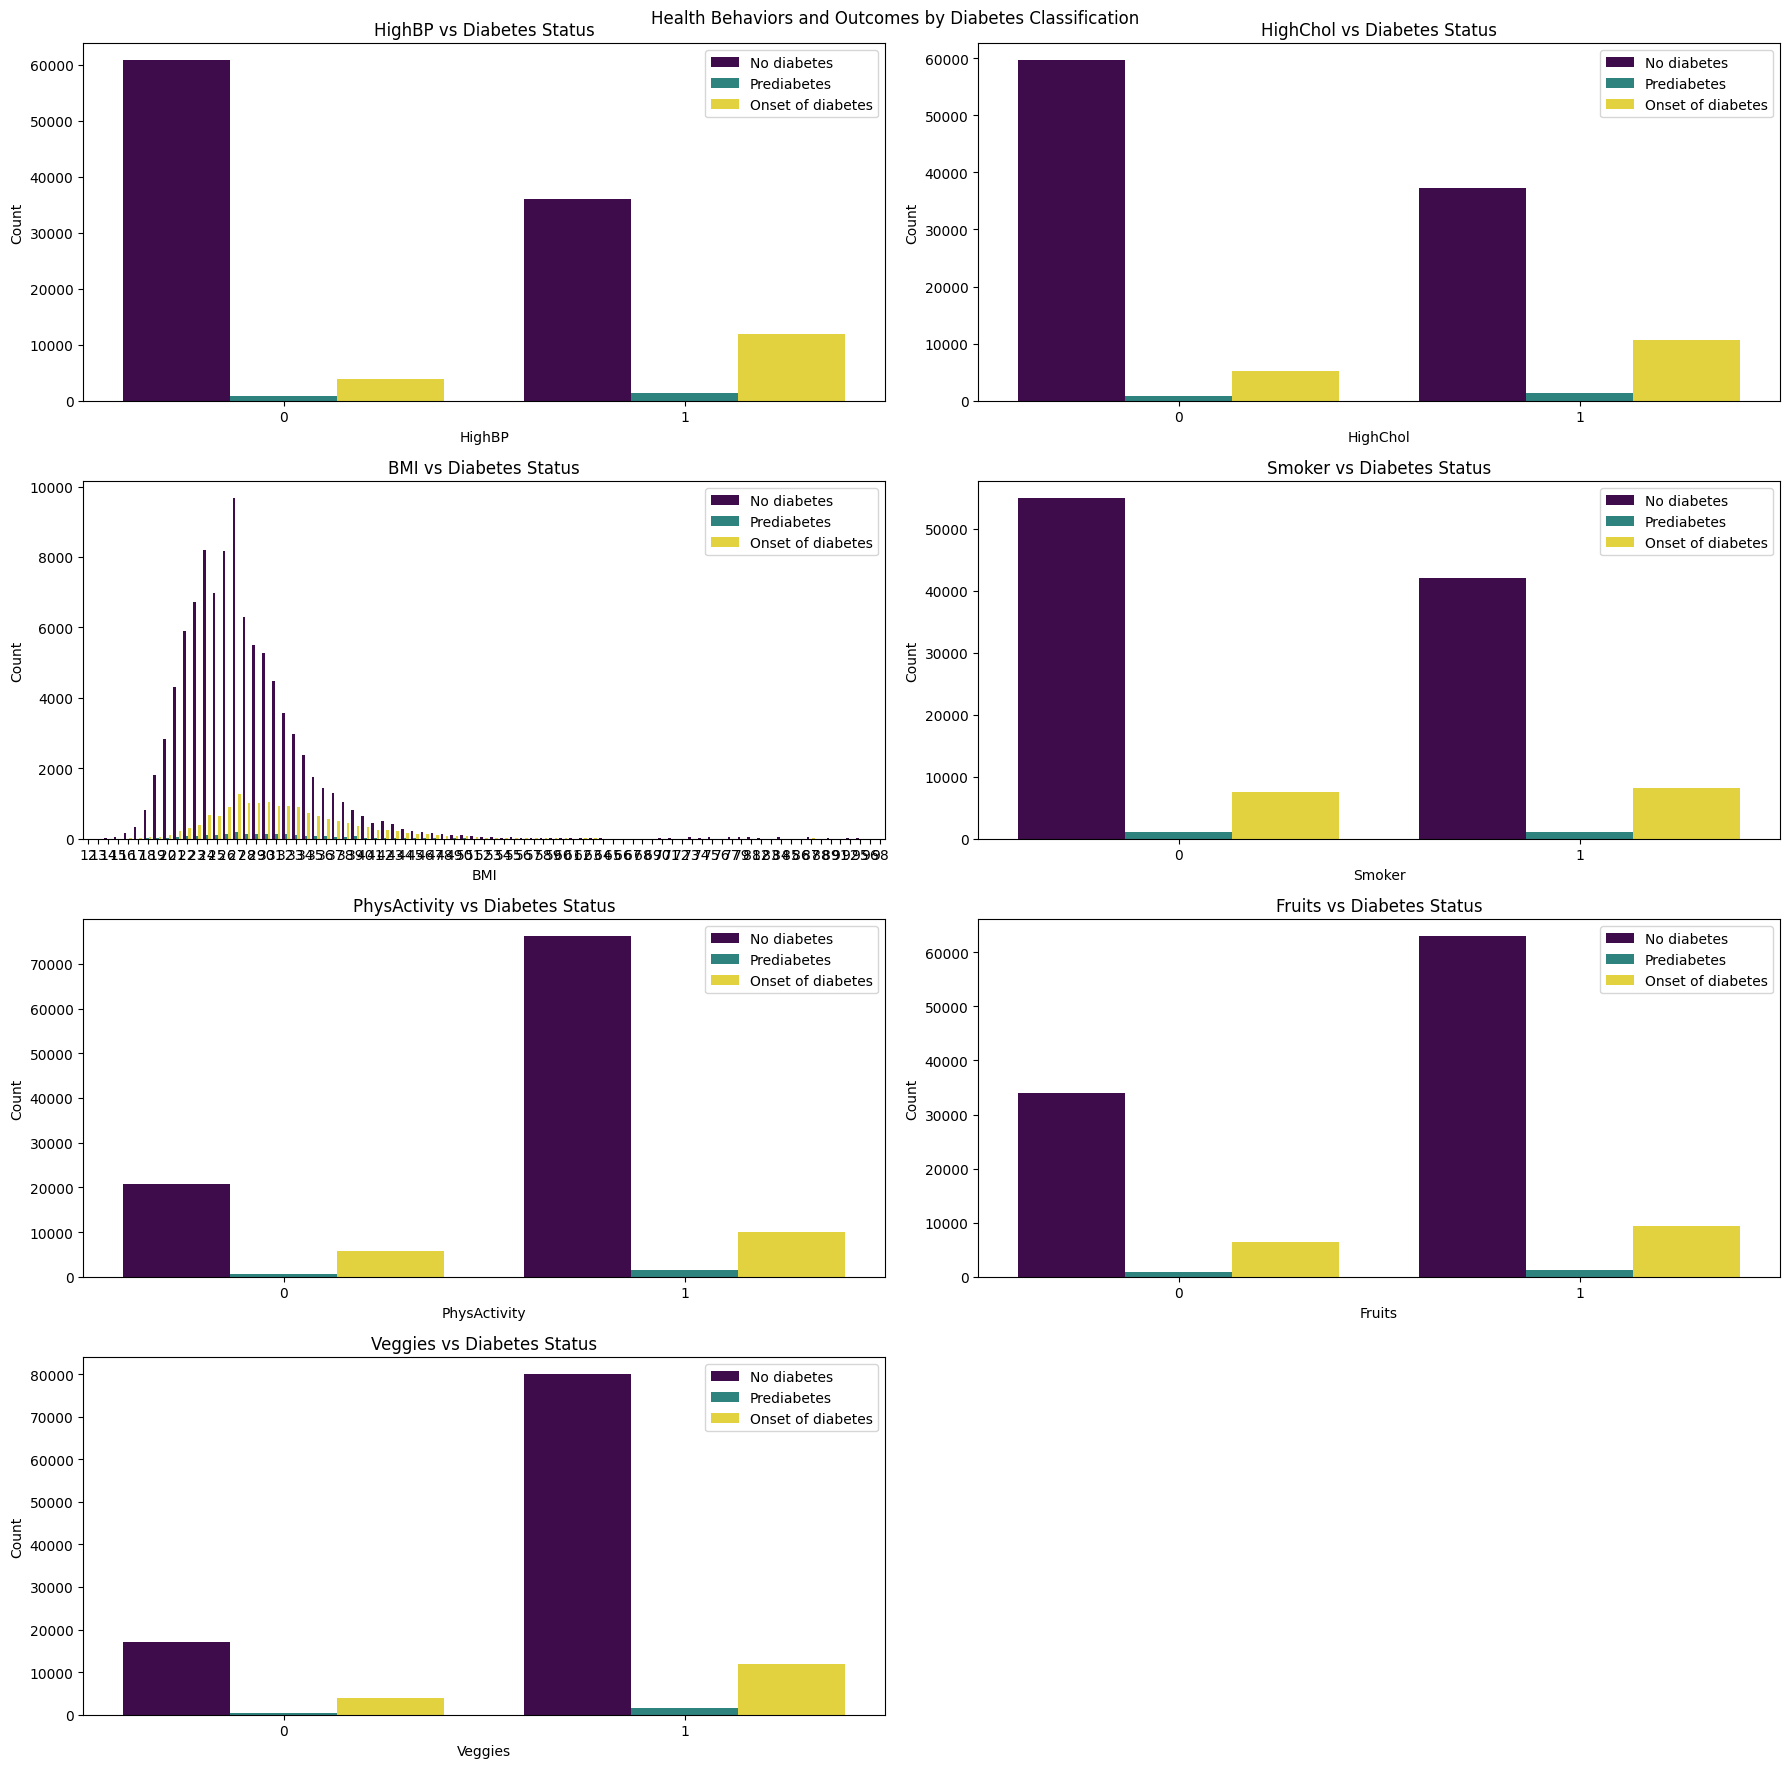

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset - Correct the file path
file_path = '/content/ds.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Distribution of diabetes classifications
diabetes_dist = df['Diabetes_012'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=diabetes_dist.index, y=diabetes_dist.values, palette='viridis')
plt.xlabel('Diabetes Classification')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Diabetes Classifications')
plt.xticks([0, 1, 2], ['No diabetes', 'Prediabetes', 'Onset of diabetes'])
plt.show()

# Creating a list of relevant features to analyze
relevant_features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies']

# Plotting the distribution of these features across different diabetes classifications
fig, axes = plt.subplots(4, 2, figsize=(18, 18))  # Adjusted to 4 rows and 2 columns to fit all features

fig.suptitle('Health Behaviors and Outcomes by Diabetes Classification')

# Loop through the relevant features and create count plots
for i, feature in enumerate(relevant_features):
    sns.countplot(x=feature, hue='Diabetes_012', data=df, ax=axes[i // 2, i % 2], palette='viridis')
    axes[i // 2, i % 2].set_xlabel(feature)
    axes[i // 2, i % 2].set_ylabel('Count')
    axes[i // 2, i % 2].legend(['No diabetes', 'Prediabetes', 'Onset of diabetes'])
    axes[i // 2, i % 2].set_title(f'{feature} vs Diabetes Status')

# Remove any unused subplots
if len(relevant_features) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = '/content/ds.csv'
df = pd.read_csv(file_path)

# Feature selection: Define the target and features
target = 'Diabetes_012'
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
            'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
            'Education', 'Income']

X = df[features]
y = df[target]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Random Forest Classifier:
Accuracy: 0.8426474001857011
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     29070
           1       0.00      0.00      0.00       635
           2       0.48      0.18      0.26      4759

    accuracy                           0.84     34464
   macro avg       0.45      0.38      0.39     34464
weighted avg       0.79      0.84      0.81     34464

Confusion Matrix:
[[28183    21   866]
 [  587     0    48]
 [ 3895     6   858]]

Gradient Boosting Classifier:
Accuracy: 0.8508008356545961
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     29070
           1       0.00      0.00      0.00       635
           2       0.56      0.20      0.29      4759

    accuracy                           0.85     34464
   macro avg       0.47      0.39      0.40     34464
weighted avg       0.81      0.85      0.81     34